## Intro
This machine learning project aims to predict whether a customer will subscribe to a term deposit, based on data from a direct marketing campaign conducted by a Portuguese banking institution.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import joblib 

In [3]:
pd.read_csv('bank-additional-full.csv', sep=';')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
original_data = pd.read_csv('bank-additional-full.csv',sep=';')

In [5]:
data = original_data.copy()

In [6]:
data.head(11)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data.shape

(41188, 21)

In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
unnamed_col = [col for col in data.columns if "Unnamed" in col]
if unnamed_col:
    print("unnamed columns found:",unnamed_col)
else:
    print('no unnamed columns')

no unnamed columns


In [12]:
class_counts = data['y'].value_counts()
print("Class Distribution: \n", class_counts)

Class Distribution: 
 y
no     36548
yes     4640
Name: count, dtype: int64


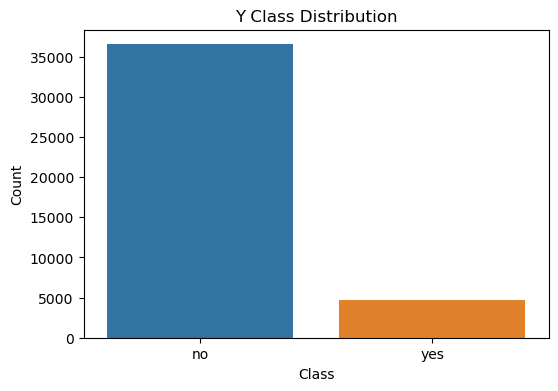

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title('Y Class Distribution')
plt.show()

Since there's a heavy class imbalance I will be balancing the weight class at training

## Preprocessing

In [16]:
binary_col = ['y','housing','loan','default']

In [17]:
for col in binary_col:
    print(f'{col} unique values:', data[col].unique())

y unique values: ['no' 'yes']
housing unique values: ['no' 'yes' 'unknown']
loan unique values: ['no' 'yes' 'unknown']
default unique values: ['no' 'unknown' 'yes']


I would not check for class imbalance as that modifying these variables may skew the data adding to much noise. which would lead to a inaccurate model
except for y of course.

In [19]:
categorical_cols = ['job','marital','education','contact','poutcome']

In [20]:
for col in categorical_cols:
    print(f'{col} unique values:\n', data[col].unique())

job unique values:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital unique values:
 ['married' 'single' 'divorced' 'unknown']
education unique values:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
contact unique values:
 ['telephone' 'cellular']
poutcome unique values:
 ['nonexistent' 'failure' 'success']


In [21]:
for col in categorical_cols:
    print(f"{col} value counts:\n", data[col].value_counts())
    print("_" * 30)

job value counts:
 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
______________________________
marital value counts:
 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
______________________________
education value counts:
 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
______________________________
contact value counts:
 contact
cellular     26144
telephone    15044
Name: count, dtype: int64
______________________________
poutcome value counts:
 poutcome
n

To Check if we should drop or combine illiterate

In [23]:
from scipy.stats import chi2_contingency

subset_data = data[data["education"].isin(["illiterate", "basic.4y"])].copy()

contingency_table = pd.crosstab(subset_data["education"],subset_data["y"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square p-value between 'illiterate' and 'basic.4y': {p}")

Chi-Square p-value between 'illiterate' and 'basic.4y': 0.20088276997473392


After checking the Chi-square and seeing that they are very independent from each other it would be best if 
I left it alone. 

In [25]:
for col in categorical_cols + binary_col:
    data = data[data[col] !='unknown']

In [26]:
for col in categorical_cols:
    print(f'{col} unique values:\n', data[col].unique())

job unique values:
 ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
marital unique values:
 ['married' 'single' 'divorced']
education unique values:
 ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
contact unique values:
 ['telephone' 'cellular']
poutcome unique values:
 ['nonexistent' 'failure' 'success']


In [27]:
for col in binary_col:
    print(f'{col} unique values:', data[col].unique())

y unique values: ['no' 'yes']
housing unique values: ['no' 'yes']
loan unique values: ['no' 'yes']
default unique values: ['no' 'yes']


To check if they have been dropped

In [29]:
columns = data.columns
int_col = [col for col in columns if col not in binary_col and categorical_cols]

## Outliers Check

I'm conducting an outlier analysis to gain a deeper understanding of the data, even 
though we're using CatBoost-a tree-based model that is inherently robust to outliers.

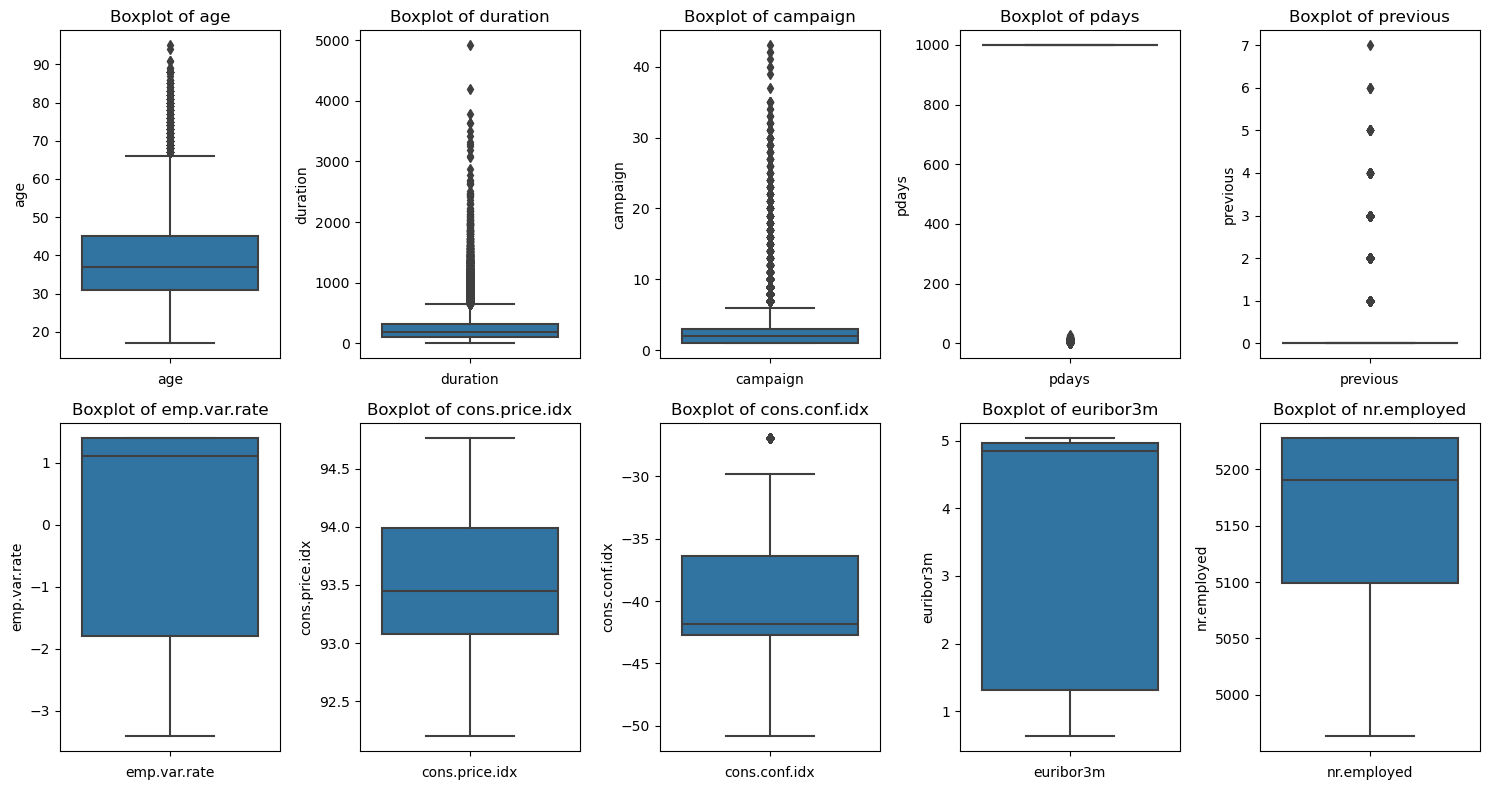

In [32]:
num_col = ["age", "duration", "campaign", "pdays","previous",
            "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed"]
plt.figure(figsize=(15,8))
for i, col in enumerate(num_col, 1):
    plt.subplot(2,5, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [33]:
Q1 = data[num_col].quantile(0.25)
Q3 = data[num_col].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = (data[num_col] < (Q1 - 1.5 * IQR)) | (data[num_col] > (Q3 + 1.5 * IQR))

iqr_outlier_count = iqr_outliers.sum()
print("IQR Outlier Count:\n", iqr_outlier_count)

IQR Outlier Count:
 age                458
duration          2174
campaign          1675
pdays             1310
previous          4652
emp.var.rate         0
cons.price.idx       0
cons.conf.idx      396
euribor3m            0
nr.employed          0
dtype: int64


In [34]:
z_scores = np.abs((data[num_col] - data[num_col].mean()) / data[num_col].std())
z_score_outliers = z_scores > 3

z_score_outlier_count = z_score_outliers.sum()
print("Z-Score Outlier Count: \n", z_score_outlier_count)

Z-Score Outlier Count: 
 age                336
duration           631
campaign           593
pdays             1310
previous           900
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
dtype: int64


In [35]:
outlier_summary = pd.DataFrame({
    "IQR Outliers": iqr_outliers.sum(),
    "Z-Score Outliers": z_score_outliers.sum()
})

display(outlier_summary)

,IQR Outliers,Z-Score Outliers
age,458,336
duration,2174,631
campaign,1675,593
pdays,1310,1310
previous,4652,900
emp.var.rate,0,0
cons.price.idx,0,0
cons.conf.idx,396,0
euribor3m,0,0
nr.employed,0,0


## Feature Selection 

Heatmaps will be used for numerical features, and the Chi-Square test will be applied to categorical features to identify the most relevant variables for inclusion in the analysis.

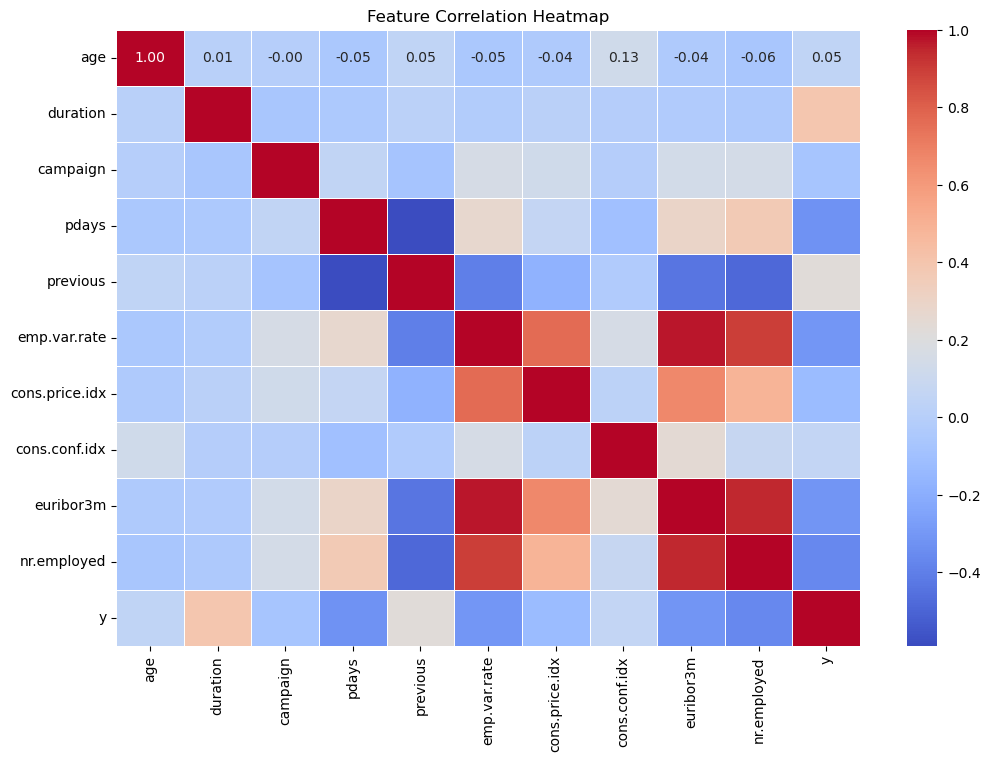

In [38]:
data["y"] = data["y"].map({"yes": 1, "no": 0})

num_data = data.select_dtypes(include=["number"])

corr_matrix = num_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [39]:
from scipy.stats import chi2_contingency

In [40]:
cat_cols = ["job", "marital","education","default","housing","loan","contact","month",
            "day_of_week","poutcome"]

chi2_results = {}
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data["y"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p

chi2_df = pd.DataFrame(list(chi2_results.items()), columns=["Feature", "p-value"])
chi2_df.sort_values(by="p-value", ascending=True, inplace=True)

In [41]:
display(chi2_df)

,Feature,p-value
7,month,0.000000e+00
9,poutcome,0.000000e+00
0,job,2.033137e-150
6,contact,4.901951e-139
2,education,1.439250e-22
1,marital,1.543738e-12
8,day_of_week,3.689334e-05
4,housing,8.165924e-02
5,loan,3.931583e-01
3,default,1.000000e+00


In [42]:
data.shape

(30488, 21)

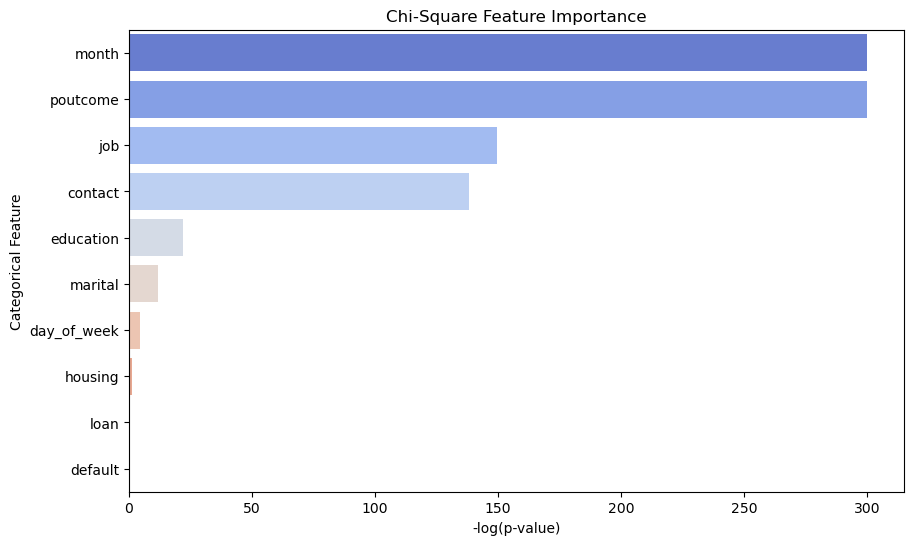

In [43]:
chi2_df["p-value"] = chi2_df["p-value"].replace(0, 1e-300)
chi2_df["-log(p-value)"] = -np.log10(chi2_df["p-value"])

plt.figure(figsize=(10,6))
sns.barplot(data=chi2_df, x="-log(p-value)", y="Feature", palette="coolwarm")
plt.xlabel("-log(p-value)")
plt.ylabel("Categorical Feature")
plt.title("Chi-Square Feature Importance")
plt.show()

In conclusion, our feature selection process has identified the 10 most important features:
month, poutcome, job, contact, education, marital status, day of the week, housing, duration,
and previous.

In [45]:
data.to_csv('Pre-processed_bank.csv')

In [46]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
selected_features = ["month", "poutcome", "job", "contact", "education", "marital",
                     "day_of_week", "housing", "duration", "previous"]

X = data[selected_features]

y = data["y"].copy()

cat_features = X.select_dtypes(include=["object"]).columns.tolist()

print(f"Categorical Features: {cat_features}")
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Categorical Features: ['month', 'poutcome', 'job', 'contact', 'education', 'marital', 'day_of_week', 'housing']
Shape of X: (30488, 10), Shape of y: (30488,)


In [48]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [49]:
catboost_model = CatBoostClassifier(loss_function="Logloss", eval_metric="AUC", cat_features=cat_features)

In [50]:
best_catboost = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    cat_features=cat_features,
    class_weights=[1, 4],  
    iterations=1227  
)
best_catboost.fit(X_train, y_train)


Learning rate set to 0.031553
0:	total: 201ms	remaining: 4m 5s
1:	total: 252ms	remaining: 2m 34s
2:	total: 293ms	remaining: 1m 59s
3:	total: 334ms	remaining: 1m 42s
4:	total: 378ms	remaining: 1m 32s
5:	total: 421ms	remaining: 1m 25s
6:	total: 462ms	remaining: 1m 20s
7:	total: 506ms	remaining: 1m 17s
8:	total: 555ms	remaining: 1m 15s
9:	total: 597ms	remaining: 1m 12s
10:	total: 643ms	remaining: 1m 11s
11:	total: 690ms	remaining: 1m 9s
12:	total: 740ms	remaining: 1m 9s
13:	total: 782ms	remaining: 1m 7s
14:	total: 832ms	remaining: 1m 7s
15:	total: 870ms	remaining: 1m 5s
16:	total: 920ms	remaining: 1m 5s
17:	total: 966ms	remaining: 1m 4s
18:	total: 1.01s	remaining: 1m 4s
19:	total: 1.06s	remaining: 1m 4s
20:	total: 1.11s	remaining: 1m 3s
21:	total: 1.16s	remaining: 1m 3s
22:	total: 1.2s	remaining: 1m 3s
23:	total: 1.25s	remaining: 1m 2s
24:	total: 1.3s	remaining: 1m 2s
25:	total: 1.35s	remaining: 1m 2s
26:	total: 1.4s	remaining: 1m 2s
27:	total: 1.44s	remaining: 1m 1s
28:	total: 1.49s	rema

In [51]:
from sklearn.metrics import roc_auc_score, classification_report

In [52]:
threshold = 0.65
y_val_proba = best_catboost.predict_proba(X_val)[:,1]
y_val_preds = (y_val_proba > threshold).astype(int)

In [53]:
print("Validation Classification Report:\n", classification_report(y_val, y_val_preds))
print("Validation AUC Score:", roc_auc_score(y_val, y_val_proba))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      3994
           1       0.57      0.71      0.63       579

    accuracy                           0.89      4573
   macro avg       0.76      0.81      0.78      4573
weighted avg       0.91      0.89      0.90      4573

Validation AUC Score: 0.9264944480624219


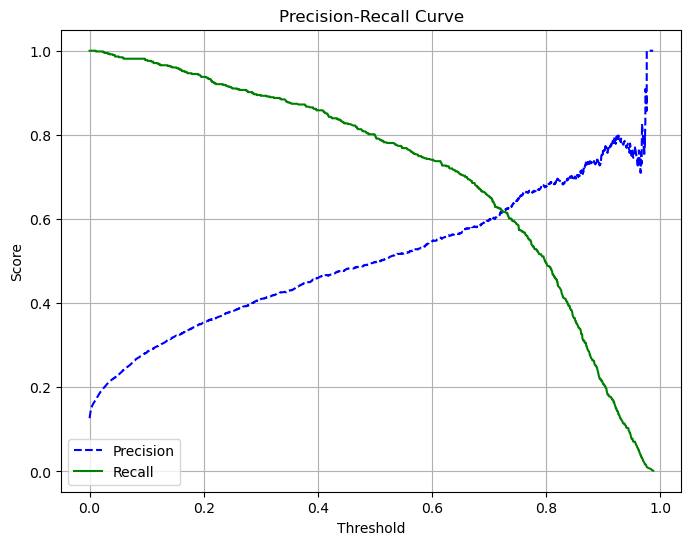

In [54]:
from sklearn.metrics import precision_recall_curve


y_val_proba = best_catboost.predict_proba(X_val)[:, 1]


precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

In [55]:
best_threshold_idx = np.argmax(precisions >= recalls)
best_threshold = thresholds[best_threshold_idx]

print(f"Best Threshold: {best_threshold:.2f}")

Best Threshold: 0.72


In [56]:
y_val_preds = (y_val_proba > best_threshold).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print("Validation Classification Report:\n", classification_report(y_val, y_val_preds))
print("Validation AUC Score:", roc_auc_score(y_val, y_val_proba))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3994
           1       0.62      0.62      0.62       579

    accuracy                           0.90      4573
   macro avg       0.78      0.78      0.78      4573
weighted avg       0.90      0.90      0.90      4573

Validation AUC Score: 0.9264944480624219


In [102]:
y_test_proba = best_catboost.predict_proba(X_test)[:,1]

best_threshold_idx = np.argmin(np.abs(precisions - recalls)) 
best_threshold = thresholds[best_threshold_idx]

print(f"Best Threshold: {best_threshold:.2f}")

Best Threshold: 0.72


In [108]:
best_threshold = 0.72

y_test_preds = (y_test_proba > best_threshold).astype(int)

print("Final Test Set Classification Report:\n", classification_report(y_test, y_test_preds))
print("Final Test Set AUC Score:", roc_auc_score(y_test, y_test_proba))

Final Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3995
           1       0.58      0.56      0.57       579

    accuracy                           0.89      4574
   macro avg       0.76      0.75      0.76      4574
weighted avg       0.89      0.89      0.89      4574

Final Test Set AUC Score: 0.9117175830755629


In [110]:
best_catboost.save_model("final_catboost_model.cbm")

In [112]:
import shap

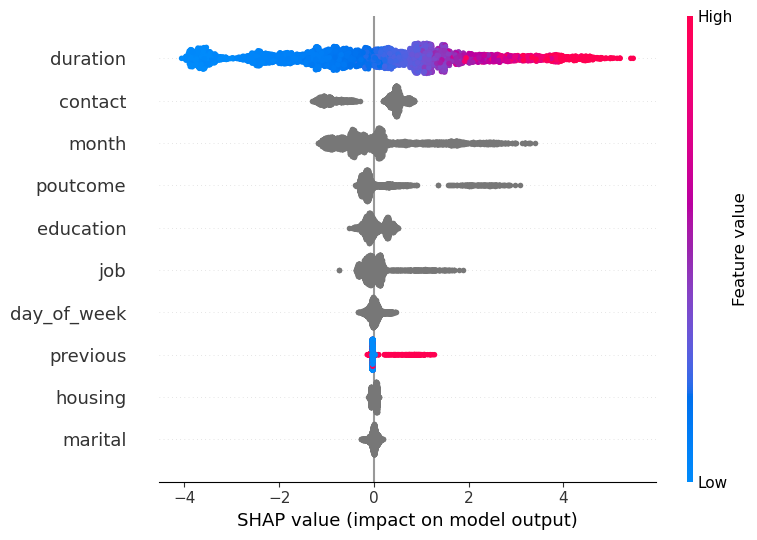

In [114]:
explainer = shap.Explainer(best_catboost)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

Based on the data we can say that duration is the most important variables by far, this makes sense as the 
longer the call, the more likely the customer is interested. 